In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
df=pd.read_csv("files folder\\power.consumption.txt",';',low_memory=False)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [87]:
dict={'Global_active_power':'household global minute-averaged active power (in kilowatt)',
     'Global_reactive_power':'household global minute-averaged reactive power (in kilowatt)',
     'Voltage':'minute-averaged voltage (in volt)',
     'Global_intensity':'household global minute-averaged current intensity (in ampere)',
     'Sub_metering_1':'It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered) (in watt-hour of active energy)',
     'Sub_metering_2':'It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light (in watt-hour of active energy)',
     'Sub_metering_3':'It corresponds to an electric water-heater and an air-conditioner (in watt-hour of active energy)'
}
pd.options.display.max_colwidth=170
data=pd.DataFrame(dict,[''])
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
,household global minute-averaged active power (in kilowatt),household global minute-averaged reactive power (in kilowatt),minute-averaged voltage (in volt),household global minute-averaged current intensity (in ampere),"It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered) (in watt-hour of active energy)","It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light (in watt-hour of active energy)",It corresponds to an electric water-heater and an air-conditioner (in watt-hour of active energy)


In [4]:
df=df.set_index(['Date','Time'])
df

Global_active_power Global_reactive_power  Voltage  \
Date       Time                                                          
16/12/2006 17:24:00               4.216                 0.418  234.840   
           17:25:00               5.360                 0.436  233.630   
           17:26:00               5.374                 0.498  233.290   
           17:27:00               5.388                 0.502  233.740   
           17:28:00               3.666                 0.528  235.680   
...                                 ...                   ...      ...   
26/11/2010 20:58:00               0.946                 0.000  240.430   
           20:59:00               0.944                 0.000  240.000   
           21:00:00               0.938                 0.000  239.820   
           21:01:00               0.934                 0.000  239.700   
           21:02:00               0.932                 0.000  239.550   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
Date       Time                                                      
16/12/2006 17:24:00           18.400          0.000          1.000   
           17:25:00           23.000          0.000          1.000   
           17:26:00           23.000          0.000          2.000   
           17:27:00           23.000          0.000          1.000   
           17:28:00           15.800          0.000          1.000   
...                              ...            ...            ...   
26/11/2010 20:58:00            4.000          0.000          0.000   
           20:59:00            4.000          0.000          0.000   
           21:00:00            3.800          0.000          0.000   
           21:01:00            3.800          0.000          0.000   
           21:02:00            3.800          0.000          0.000   

                     Sub_metering_3  
Date       Time                      
16/12/2006 17:24:00            17.0  
           17:25:00            16.0  
           17:26:00            17.0  
           17:27:00            17.0  
           17:28:00            17.0  
...                             ...  
26/11/2010 20:58:00             0.0  
           20:59:00             0.0  
           21:00:00             0.0  
           21:01:00             0.0  
           21:02:00             0.0  

[2075259 rows x 7 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2075259 entries, ('16/12/2006', '17:24:00') to ('26/11/2010', '21:02:00')
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 118.8+ MB


In [62]:
k=df.columns.tolist()
k

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [63]:
for i in range(len(k)):
    df[k[i]]=pd.to_numeric(df[k[i]], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2075259 entries, ('16/12/2006', '17:24:00') to ('26/11/2010', '21:02:00')
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 118.8+ MB


In [66]:
for n in range(7): 
    df.iloc[:,n]=df.iloc[:,n].fillna(df.iloc[:,n].mean())
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [72]:
scaled_df=scaler.fit_transform(df)
print(scaled_df)
df=pd.DataFrame(scaled_df, columns= df.columns)
df

[[ 2.97374903  2.62721673 -1.86351698 ... -0.18348885 -0.05159823
   1.25731535]
 [ 4.06259337  2.78791067 -2.23933513 ... -0.18348885 -0.05159823
   1.13804304]
 [ 4.07591839  3.34141203 -2.34493693 ... -0.18348885  0.1212486
   1.25731535]
 ...
 [-0.1462088  -1.10445372 -0.31676127 ... -0.18348885 -0.22444507
  -0.77031395]
 [-0.15001594 -1.10445372 -0.35403249 ... -0.18348885 -0.22444507
  -0.77031395]
 [-0.15191952 -1.10445372 -0.40062152 ... -0.18348885 -0.22444507
  -0.77031395]]


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.973749,2.627217,-1.863517,3.118369,-0.183489,-0.051598,1.257315
1,4.062593,2.787911,-2.239335,4.159920,-0.183489,-0.051598,1.138043
2,4.075918,3.341412,-2.344937,4.159920,-0.183489,0.121249,1.257315
3,4.089243,3.377122,-2.205170,4.159920,-0.183489,-0.051598,1.257315
4,2.450266,3.609235,-1.602618,2.529666,-0.183489,-0.051598,1.257315
...,...,...,...,...,...,...,...
2075254,-0.138595,-1.104454,-0.127299,-0.142140,-0.183489,-0.224445,-0.770314
2075255,-0.140498,-1.104454,-0.260854,-0.142140,-0.183489,-0.224445,-0.770314
2075256,-0.146209,-1.104454,-0.316761,-0.187425,-0.183489,-0.224445,-0.770314
2075257,-0.150016,-1.104454,-0.354032,-0.187425,-0.183489,-0.224445,-0.770314


In [93]:
n_df=df.sample(2500)
model=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
labels=model.fit_predict(n_df[["Global_active_power","Global_reactive_power"]])
Y=pd.DataFrame(labels)
Y

,0
0,1
1,1
2,4
3,1
4,4
...,...
2495,4
2496,4
2497,4
2498,4


Text(0, 0.5, 'Global reactive P.')

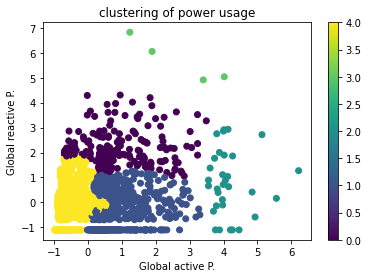

In [102]:
fig=plt.figure()
graph=fig.add_subplot(111)
scatter=graph.scatter(n_df["Global_active_power"],n_df["Global_reactive_power"],c=Y[0])
plt.colorbar(scatter)
graph.set_title("clustering of power usage")
graph.set_xlabel("Global active P.")
graph.set_ylabel("Global reactive P.")

This plot represents the reactive power againt the active power.the reactive power is the power used as a storage it is a sort of energy that  flows back and forth meaning that it goes both ways. However the active power is the one used to supply the actual circuits.
We can then deduce from this scatter plot that the households that are:

_ yellow : low energy consumption / low reactive power ; economic but no forecast

_ blue : medium energy consumption / low reactive power ; possibly some waste or ideally an alternative power source

_ cyan : high energy consumption / low reactive power ; a high waste is observed

_ purple : medium energy consumption / medium reactive power ; an average consumption and storage

_ green : high energy consumption / high reactive power ; they are using the energy they store (almost no waste)


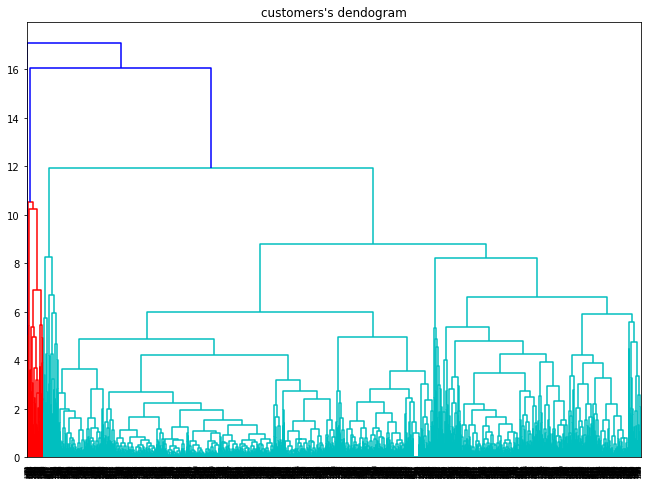

In [152]:
plt.figure(figsize=(11,8))
plt.title("customers's dendogram")
a=sch.linkage(n_df, method='complete')
dend = sch.dendrogram(a)

Text(0, 0.5, 'Global reactive P.')

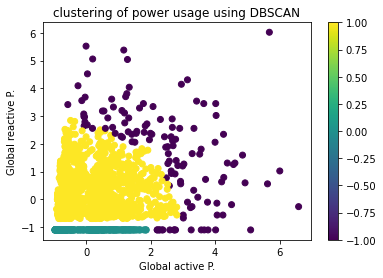

In [186]:
model = DBSCAN(eps=0.30, min_samples=9)
labels=model.fit_predict(n_df[["Global_active_power","Global_reactive_power"]])
labelstable=pd.DataFrame(labels)
fig=plt.figure()
graph=fig.add_subplot(111)
scatter=graph.scatter(n_df["Global_active_power"],n_df["Global_reactive_power"],c=labelstable[0])
plt.colorbar(scatter)
graph.set_title("clustering of power usage using DBSCAN")
graph.set_xlabel("Global active P.")
graph.set_ylabel("Global reactive P.")